# New Home Construction Prediction - Markets Surviving During Covid-19

## Table of contents

1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

---

## 1. Introduction <a name="introduction"/>

Covid-19 has caught the world off-guard and has created a lot of uncertaintity in all the markets.  The purpose of this report is to predict which states that are going to continue trending positively within the new home construction

The primary criteria for a market surviving will be a positive outlook while taking seasonality swings in to consideration.

The following data analysis will use current data to predict which states will continue to grow in new home construction.

---

## 2. Data

---

### Load the required libraries

Import the necessary dependencies for the notebook

In [1]:
# Import pandas 
import pandas as pd

# Import numpy
import numpy as np

# Matplotlib and plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
%matplotlib inline 

# Map rendering library
#!conda install -c conda-forge folium=0.5.0 --yes
#pip install folium
import folium

# Import date library
from datetime import datetime

print("Libraries have been imported")

Libraries have been imported


### Load the data from the United States Census Bureau

In [295]:
# Function that is used to load most current data whenever it is ran

def loadData():
    
    # Reteive todays data and then calculate the current year and month 
    today = datetime.today()
    curyear = today.year - 2000
    curmonth = today.month - 2
    
    # Initialize the necessary DataFrames that will be used within the loop statement
    df_csv = pd.DataFrame()
    df_temp = pd.DataFrame()
    
    # Initialize the filename to blanks
    filename = ''
    
    # Set the years to loop through
    years = {curyear-3, curyear - 2, curyear - 1, curyear}
    
    # Loop through the years
    for year in years:
        # Set the months to loop through
        months = {1,2,3,4,5,6,7,8,9,10,11,12}
        
        # Loop through the months
        for month in months:
            
            # Create the filename based on the months that are applicable
            # The filename structure is https://www2.census.gov/econ/bps/State/st + str((year*100) + month) + c.txt
            if (year == curyear):
                if(month <= curmonth):
                    filename = 'https://www2.census.gov/econ/bps/State/st'+ str((year*100) + month)+'c.txt'
            elif (year == curyear - 1 or year == curyear - 2):
                filename = 'https://www2.census.gov/econ/bps/State/st'+ str((year*100) + month)+'c.txt'
            elif (year == curyear - 3):
                if(month > curmonth):
                    filename = 'https://www2.census.gov/econ/bps/State/st'+ str((year*100) + month)+'c.txt'
            
            # Retrieve the file details if the filename is not blank
            if (filename != ''):
                df_temp = pd.read_csv(filename, index_col=False)
                df_temp['Year'] = year
                df_temp['Month'] = month
                df_csv = df_csv.append(df_temp, ignore_index=True)
                print(filename, ' - ', df_csv.shape)
            
            # Set the filename back to blanks otherwise it retains the information and can cause errors
            filename=''
    
    # Remove the rows with Date in them
    df_csv=df_csv[df_csv.Survey != "Date"]
    
    # Filter to the first set of data - there is inferred and reported data and we are using the inferred to get a larger dataset of actual numbers while the values are estimations
    df_filtered = df_csv[['Year','Month','Survey','FIPS','Region','Division','State','Unnamed: 5','1-unit','Unnamed: 7','Unnamed: 8','2-units', 
                          'Unnamed: 10','Unnamed: 11','3-4 units','Unnamed: 13','Unnamed: 14','5+ units','Unnamed: 16']]
    
    # Rename the columns in order for the data to make sense
    df_filtered.rename(columns={'Unnamed: 5':'1U Buildings','1-unit':'1U Units','Unnamed: 7':'1U Value','Unnamed: 8':'2U Buildings','2-units':'2U Units', 
                                'Unnamed: 10':'2U Value','Unnamed: 11':'3-4U Buildings','3-4 units':'3-4U Units','Unnamed: 13':'3-4U Value', 
                                'Unnamed: 14':'5+U Buildings','5+ units':'5+U Units','Unnamed: 16':'5+U Value'}, inplace=True)
    
    # Use a dictionary to convert the column types
    convert_type = {'1U Buildings':int,'1U Units':int,'1U Value':int,'2U Buildings':int,'2U Units':int, 
                        '2U Value':int,'3-4U Buildings':int,'3-4U Units':int,'3-4U Value':int, 
                        '5+U Buildings':int,'5+U Units':int,'5+U Value':int}
    
    # Column type conversion
    df_filtered = df_filtered.astype(convert_type)
    
    # Create Total Columns
    df_filtered["Total Buildings"] = df_filtered["1U Buildings"] + df_filtered["2U Buildings"] + df_filtered["3-4U Buildings"] + df_filtered["5+U Buildings"]
    df_filtered["Total Units"] = df_filtered["1U Units"] + df_filtered["2U Units"] + df_filtered["3-4U Units"] + df_filtered["5+U Units"]
    df_filtered["Total Value"] = df_filtered["1U Value"] + df_filtered["2U Value"] + df_filtered["3-4U Value"] + df_filtered["5+U Value"]
    df_filtered["Average Value"] = df_filtered["Total Value"] / df_filtered["Total Buildings"]
    return df_filtered

In [296]:
# Retrieve the required data using the loadData function that was created into a DataFrame
df_data = loadData()

https://www2.census.gov/econ/bps/State/st1705c.txt  -  (66, 30)
https://www2.census.gov/econ/bps/State/st1706c.txt  -  (132, 30)
https://www2.census.gov/econ/bps/State/st1707c.txt  -  (198, 30)
https://www2.census.gov/econ/bps/State/st1708c.txt  -  (264, 30)
https://www2.census.gov/econ/bps/State/st1709c.txt  -  (330, 30)
https://www2.census.gov/econ/bps/State/st1710c.txt  -  (396, 30)
https://www2.census.gov/econ/bps/State/st1711c.txt  -  (462, 30)
https://www2.census.gov/econ/bps/State/st1712c.txt  -  (528, 30)
https://www2.census.gov/econ/bps/State/st1801c.txt  -  (594, 30)
https://www2.census.gov/econ/bps/State/st1802c.txt  -  (660, 30)
https://www2.census.gov/econ/bps/State/st1803c.txt  -  (726, 30)
https://www2.census.gov/econ/bps/State/st1804c.txt  -  (792, 30)
https://www2.census.gov/econ/bps/State/st1805c.txt  -  (858, 30)
https://www2.census.gov/econ/bps/State/st1806c.txt  -  (924, 30)
https://www2.census.gov/econ/bps/State/st1807c.txt  -  (990, 30)
https://www2.census.gov/ec

In [134]:
# Display the first 5 rows of the data to get a sense of what we are looking at
df_data.head()

,Year,Month,Survey,FIPS,Region,Division,State,1U Buildings,1U Units,1U Value,...,3-4U Buildings,3-4U Units,3-4U Value,5+U Buildings,5+U Units,5+U Value,Total Buildings,Total Units,Total Value,Average Value
1,17,5,201705,01,3,6,Alabama,1154,1154,238491,...,1,4,574,5,94,10721,1173,1278,254712,217.145780
2,17,5,201705,02,4,9,Alaska,132,132,41454,...,2,7,1002,2,13,2055,142,164,47053,331.359155
3,17,5,201705,04,4,8,Arizona,2703,2703,664615,...,9,33,4404,26,964,123736,2746,3716,793830,289.085943
4,17,5,201705,05,3,7,Arkansas,625,625,126922,...,4,13,825,4,34,2136,646,698,132320,204.829721
5,17,5,201705,06,4,9,California,5470,5470,1642366,...,46,164,34279,152,3811,709785,5745,9599,2419152,421.088251


In [234]:
df_region = df_data[(df_data["FIPS"].str.contains("R"))]
df_division = df_data[(df_data["FIPS"].str.contains("D"))]
df_state = df_data[(~df_data["FIPS"].str.contains("R")) & (~df_data["FIPS"].str.contains("D")) & (~df_data["FIPS"].str.contains("U"))]

In [136]:
df_region.sort_values(by=["Region","Year","Month"], inplace = True)
df_region.head()

c:\users\davidunrau\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,Survey,FIPS,Region,Division,State,1U Buildings,1U Units,1U Value,...,3-4U Buildings,3-4U Units,3-4U Value,5+U Buildings,5+U Units,5+U Value,Total Buildings,Total Units,Total Value,Average Value
53,17,5,201705,R1,1,0,Northeast Region,5228,5228,1294242,...,128,437,42826,307,5705,724365,5820,11684,2107331,362.084364
119,17,6,201706,R1,1,0,Northeast Region,5850,5850,1475405,...,100,335,44612,230,4446,542901,6355,10981,2119018,333.441070
185,17,7,201707,R1,1,0,Northeast Region,4996,4996,1212482,...,36,119,14532,220,5296,735026,5383,10673,1994736,370.562140
251,17,8,201708,R1,1,0,Northeast Region,5566,5566,1339833,...,92,321,35855,225,3875,504935,6068,10132,1932312,318.442980
317,17,9,201709,R1,1,0,Northeast Region,6429,6429,1432500,...,56,191,29468,217,4128,507835,6844,11032,2007575,293.333577


## 3. Methodology

The purpose of this project is to be able to predict when each of the divisions, regions and states will start to see an increase again within the housing markets.

In the data phase, we collected:
1. Building permit data from the United States Census Bureau for a range of current minus three years
2. The data was cleaned within the loadData function to retrieve relevant information
3. The retrieved data was broken into three different sets (division, region and state)

The analysis section will:

1. Create functions for plotting the information
2. Plot the division, region and state data so it is visual

---

## 4. Analysis

---

### Create the Analysis Functions

In [298]:
# Function for creating a subplot within the plotCharts function
# This is required so that we only need to write the code once and then can reuse it

def plotSubPlot(df, type, ncol):
    
    # loop through each of the FIPS (Federal Information Processing Standard) per DataFrame that is sent in
    # The FIPS will be a Country, Division, Region or State code
    
    for section_types in df['FIPS'].unique():
        
        # Set x to be the Survey column, a concatenation of the year and month
        x = df.loc[df['FIPS'] == section_types,'Survey'].tolist()
        
        # Set y to be the total column of the type that is being sent in (Value, Buildings or Units)
        y = df.loc[df['FIPS'] == section_types,('Total ' + type)].tolist()
        
        # Set the label to be from the State column which will be the description of either the country, division, region or state
        label = df.loc[df['FIPS'] == section_types,'State'].unique()[0]
        
        # Initialize the plot with the necessary information and apply a line with visible markers at each data point
        plt.plot(x,y,marker=".", markersize=10, label = label)
        plt.title('New Home ' + type)
        plt.xlabel('Year/Day')
        plt.ylabel('Value')
        plt.xticks(rotation = 45)
        
        # Set the legend to print to the outside right of the chart along with the number of columns to be determined by how many data points are being sent in
        plt.legend(bbox_to_anchor=(1,1),ncol=ncol)
    
    
    return plt

In [299]:
# Function for plotting the necessary charts to visualize the data

def plotCharts(df,ncol):
    
    # inititialize the figure
    fig = plt.figure(figsize=(15, 30))

    # Add the first subplot to the figure as the Values chart
    fig.add_subplot(3,1,1)
    plotSubPlot(df,'Value',ncol)

    # Add the second subplot to the figure as the Buildings chart
    fig.add_subplot(3,1,2)
    plotSubPlot(df,'Buildings',ncol)

    # Add the third subplot to the figure as the Units chart
    fig.add_subplot(3,1,3)
    plotSubPlot(df,'Units',ncol)
        
    # Return the showing of the plot
    return plt.show()

### Visualize the Data

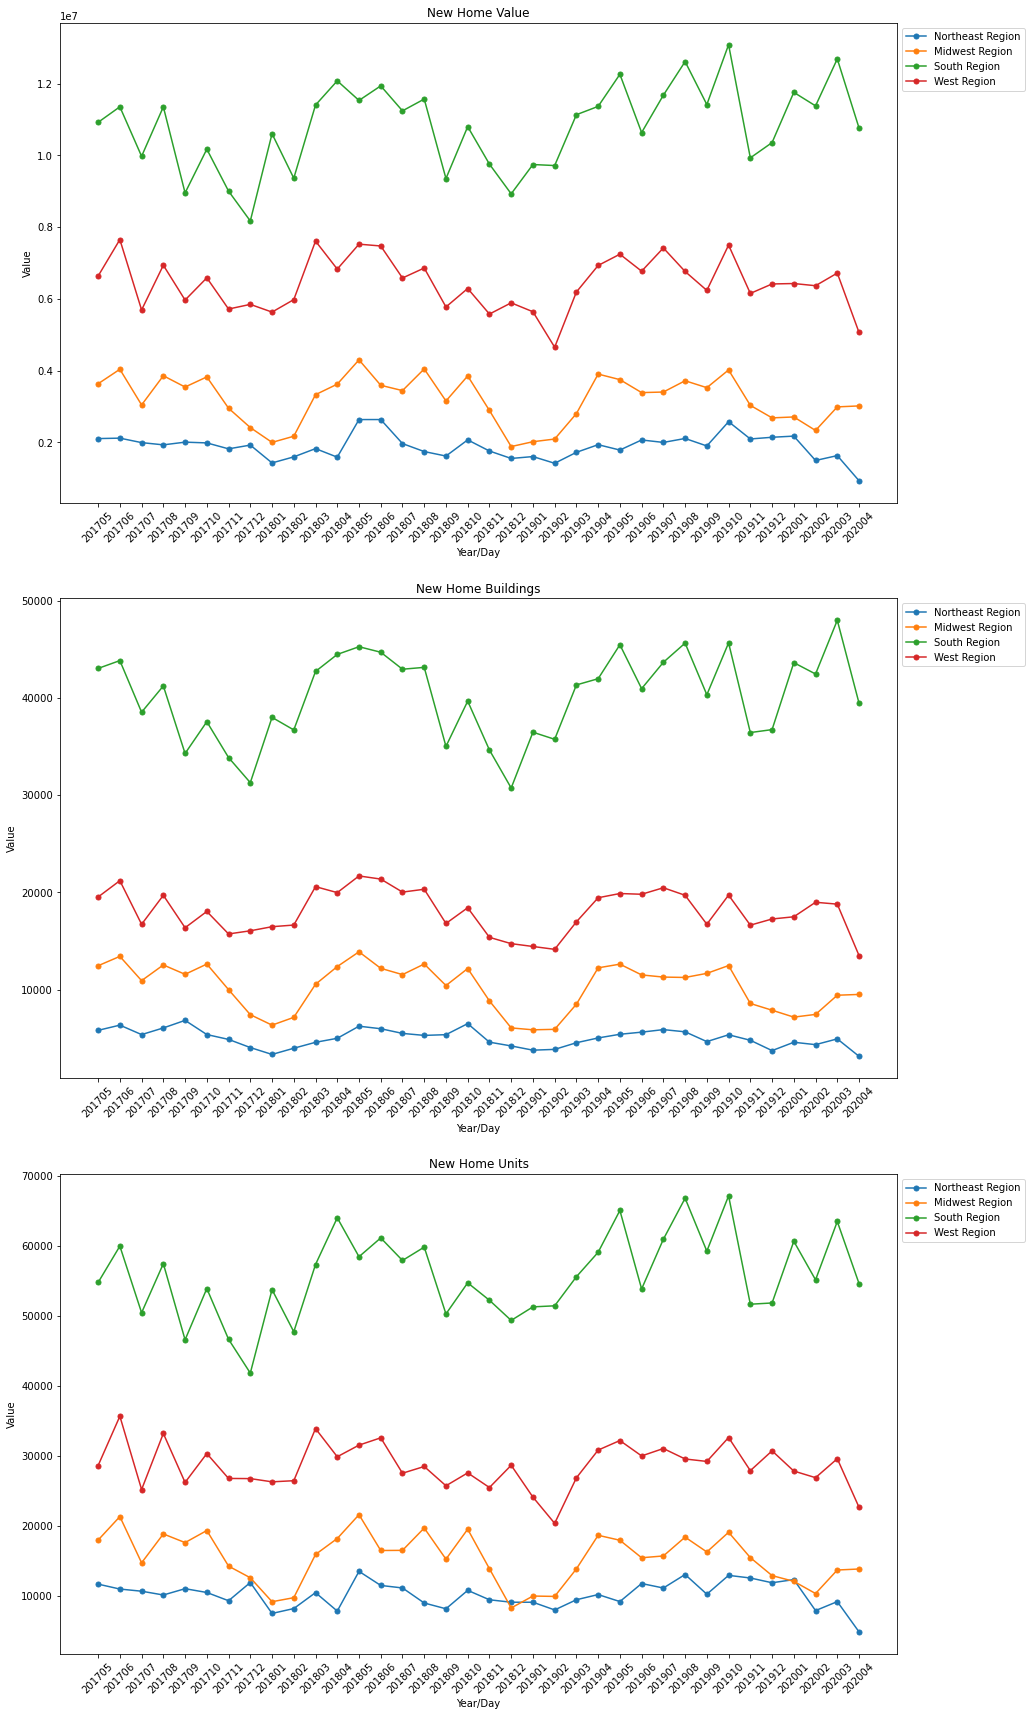

In [300]:
# Display the region charts
plotCharts(df_region,1)

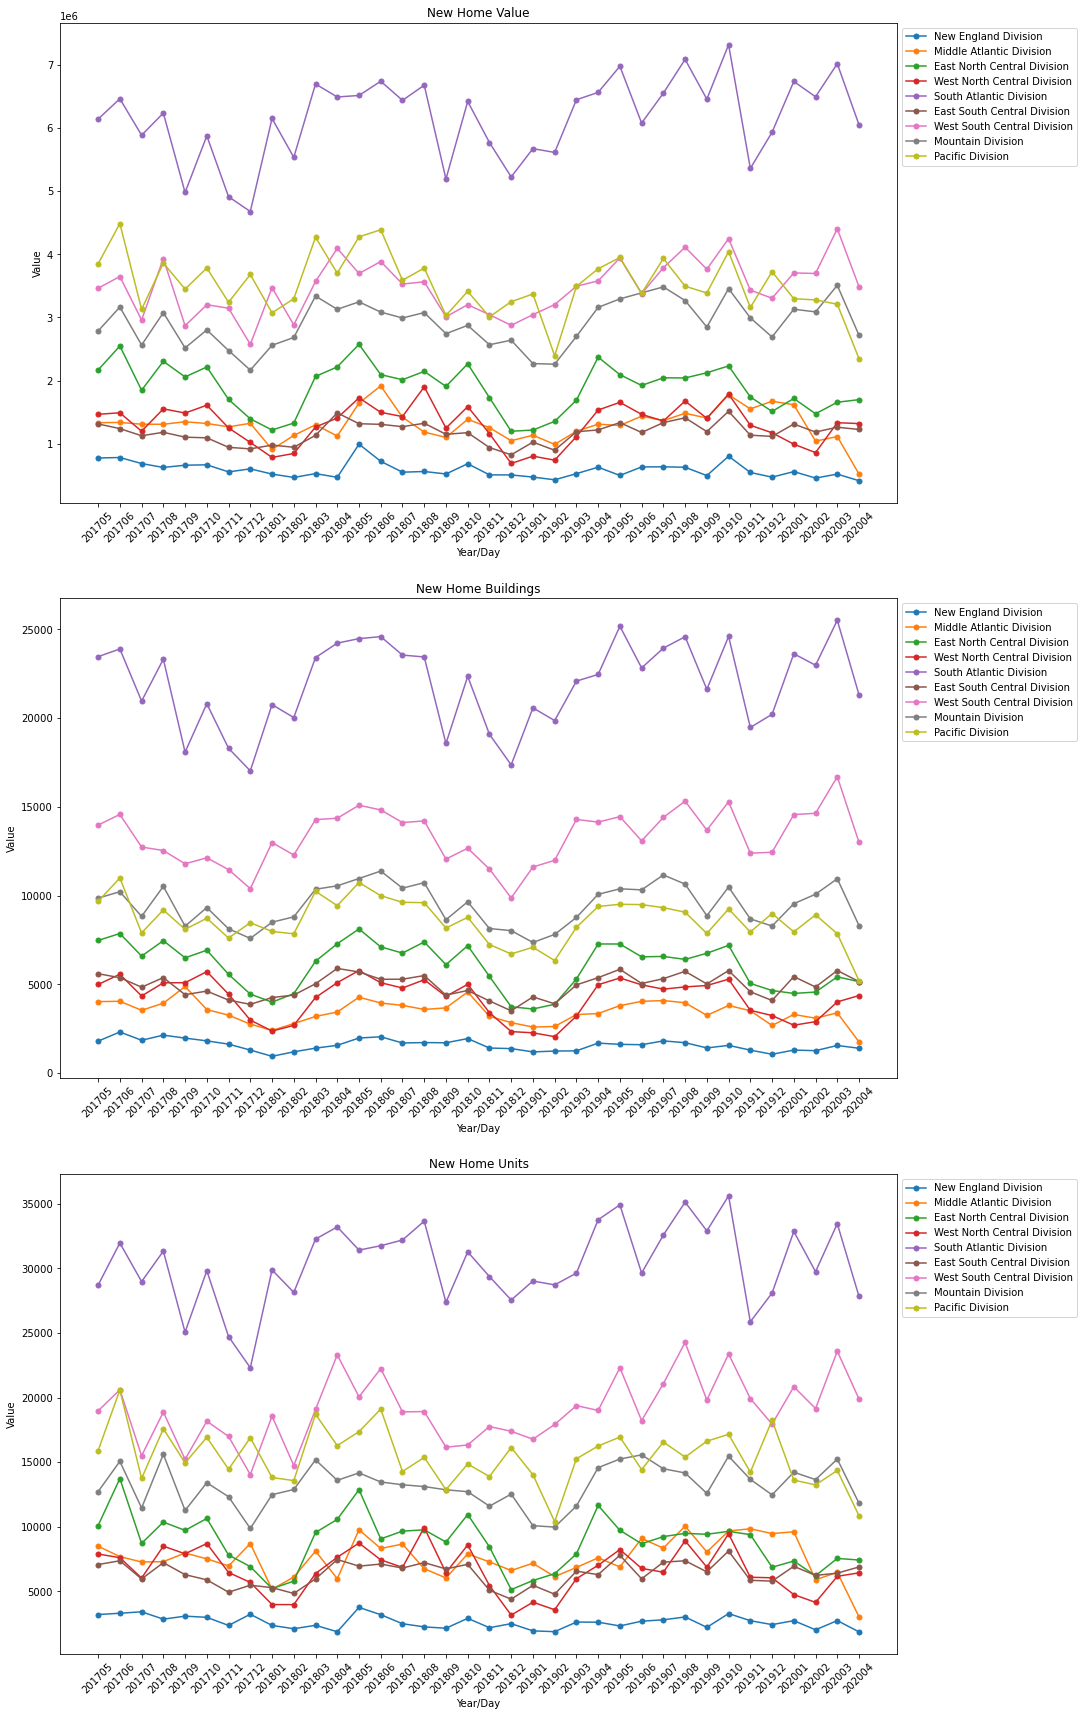

In [301]:
# Display the division charts
plotCharts(df_division,1)

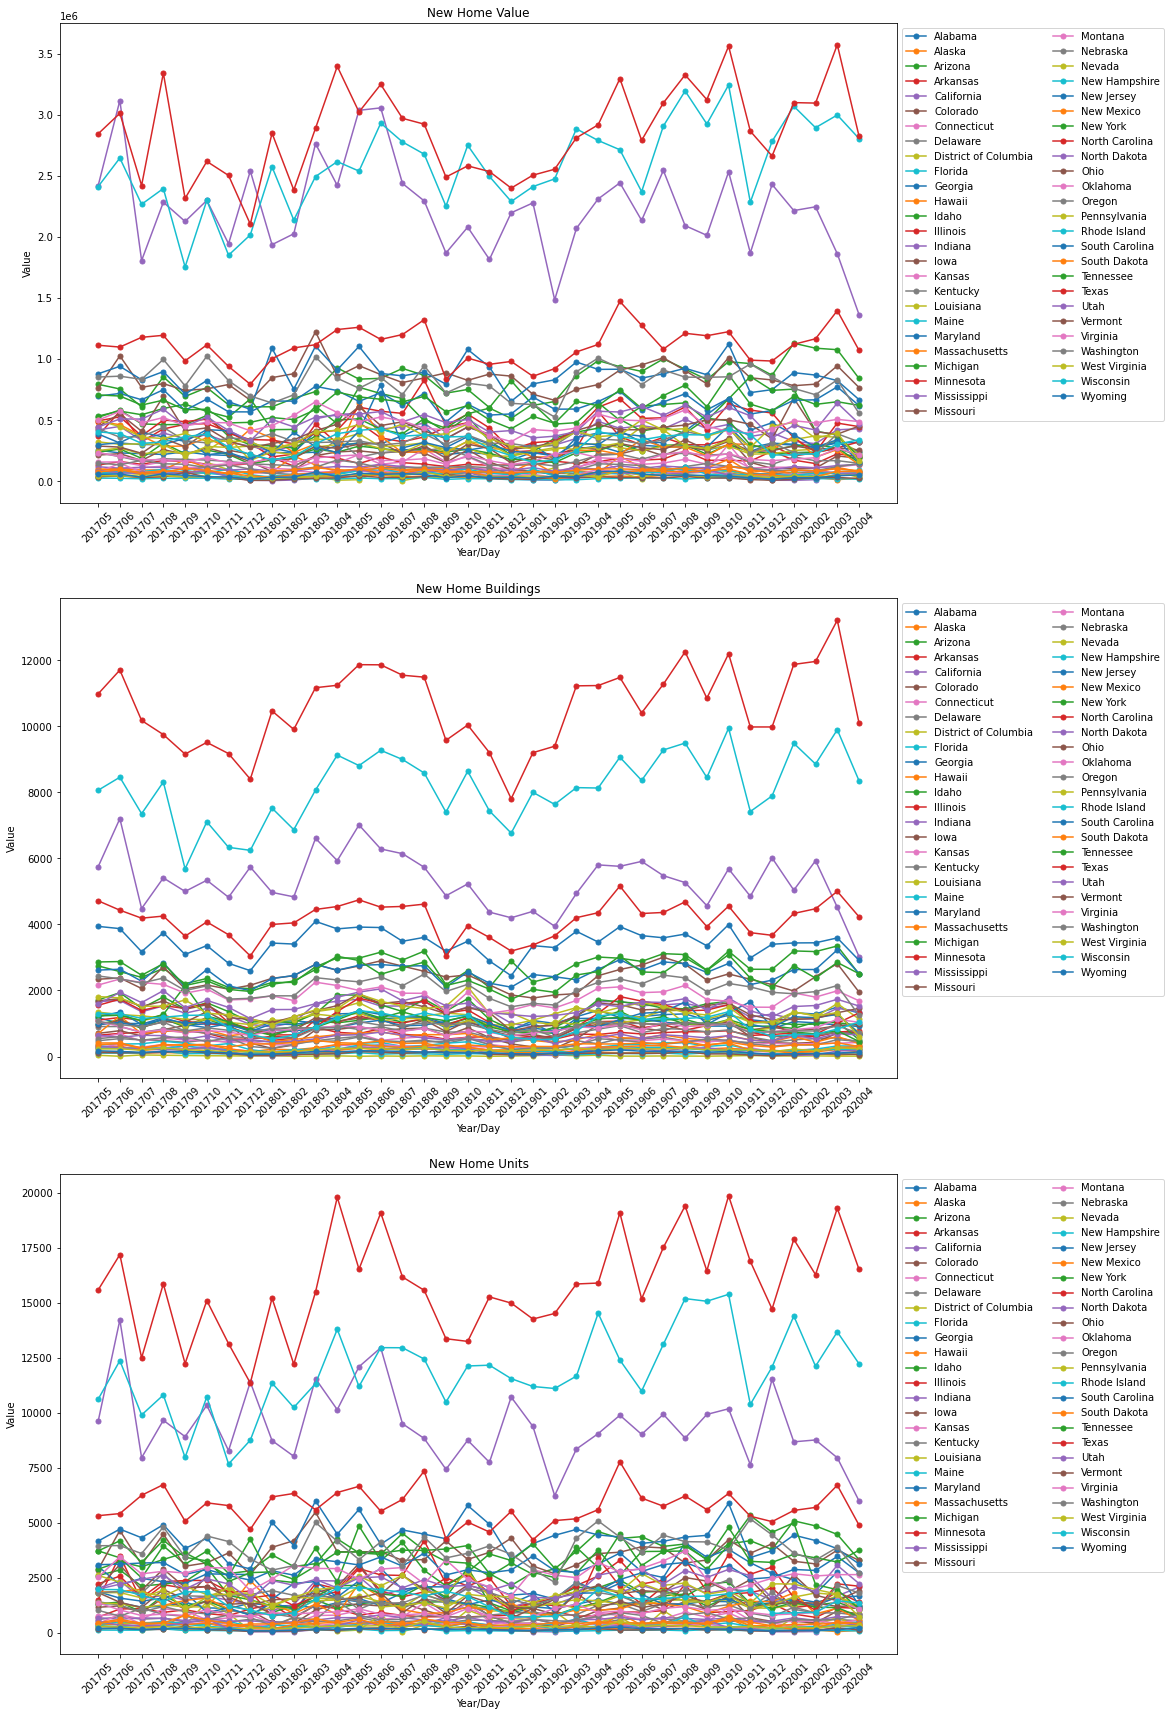

In [302]:
# Display the states data
# This one is a little harder to read as there are 51 different lines but it can show the data visually

plotCharts(df_state,2)